In [1]:
#Loading Dataset
import pandas as pd
import numpy as np

In [2]:
#loading CSV file
VG_data=pd.read_csv("vgsales.csv")

In [3]:
VG_data.head() 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring the Dataset

To begin I look at the scope of the brief for the assignment. This is shape how I will deal with the missing data. The questions are as follows:

-What are the top 5 games by global sales?  
-Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
-What is the distribution of the most popular 4 game genres?  
-Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
-What are the 3 most common “developer” in the dataset?  

#### My question:

-Compare the global sales in relation to the user score for PS2 platform?


In [4]:
VG_data.shape

(16719, 16)

I can see from the that only feature, with substantial missing values, that is involved in the assignment is the "Developer" feature. I think that the "User Score" feature is a very important metric for understanding how the consumers are scoring these games. Subsequently, I have based my question around this metric. 

Looking at the null values in the dataset I can see there some features with missing data. Some have very little missing values compared with the size of the dataset and some have very large missing values.
I can also see see from looking at the info of the dataset that the User_score feature is being shown as categorical but it is in fact numerical which indicates several missing values. 

How I will handle each feature will differ from one another. I think imputation will not be suitable as all the name values are unique. Similarly In the "Year_of_Release" and "Publisher" features, using one the various froms of imputation (mean, median, foward fill , backward fill) will not be suitable as filling the most popular answer wouldn't be an accuarte representation of the data. As a result of this analysis I will more then likely drop these the na values from these features as they only a very small proportion (2% combined) of the overall dataset. However, first I will take a look at the 6 features that conatain the most null values. 

In [5]:
VG_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
VG_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
VG_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
#VG_data["Name"].unique().tolist()

In [9]:
VG_data_1 = pd.DataFrame(VG_data)

# Exploritory Analysis continued

I can see from looking at the info method, the "User_score" feature is being shown as categorical but it is in fact numerical which indicates several missing values (confirmed when looking non nill values). 

Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating have huge numbers of missing values so these will be alot trickier to navigate. Based on the brief, I can see that the only feature I need from these is the Developer feature. 
 
The Critic/User scores and counts etc., could be a valubale feature in terms of predciting business strategies as they provide direct feedback on each game but I feel that imputing them could create a false narrative and deter from implementing an effective strategy. An effective strategy based around user and critic scores has to come from solid data, not imputed data. However, as the As Critic_Score,Critic_Count,User_Count have over 50% of the data missing I will drop these columns from the dataset. From reading the data dictionary, I can see that the user count feature displays how many users have rated the game. This is an imporatnt metric as it directly impacts the user score, assuming the overall score is an average of the scores of everybody that scored it. However, I continued with deleting it because it would be impossible to impute this data. 

After some more in depth examination, I can see that the User_Score, Rating and Developer columns follow a simialar path in terms of sharing nan values. This is true in 6769 rows. This number equates to total the number of nan values in the rating feature. To retain as much data as I can, I dropped all the rows that the three features share nan values.

Looking at the description of the numerical data (using .describe() method) I conclude that the data is slightly skewed in all of the sales features. This indicates the presence of outliers which I will need to deal with at a later point.  

## Dropping Columns over 50% of the dataset

To begin, I drop all the columns that have null values greater than 50% of the dataset. 

In [10]:
#stroing cols over 50% in a variable
cols_over_half = [x for x in VG_data_1 if VG_data_1[x].isnull().sum() > int(len(VG_data_1)/2)]

In [11]:
#Dropping cols over 50%
VG_data_1.drop(cols_over_half, axis=1, inplace=True)

In [12]:
VG_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  User_Score       10015 non-null  object 
 11  Developer        10096 non-null  object 
 12  Rating           9950 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.7+ MB


## Locating and dropping columns with the most Null Values

As discussed above, "User_Score", "Developer" and "Rating" features share 6769 rows of nan values. It is important to drop all the rows where the nan values are shared between the three. To achive this, I created a new columns called "NULL VALUES". I used the np.where function from the numpy library to find all the rows that have Nan values and place a 1 in the NULL VALUES column where this is true. The remaining rows were filled with a zero.

In [13]:
#making a new binary column that detects the presence of null values
for null in VG_data_1:
    nan_values = np.where(VG_data_1[null].isna())[0]
    VG_data_1["NULL VALUES"] = 0
    VG_data_1.loc[nan_values, "NULL VALUES"]=1

In [14]:
VG_data_1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Developer,Rating,NULL VALUES
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,Nintendo,E,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,Nintendo,E,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,Nintendo,E,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,1


I was then able to filter all the rows from the "User_Score","Developer" and "Rating" features that share null values. To drop these rows, I saved the index values of each nan row into a list and then dropped based the index. I saved the changes into a new Dataset called VG_data_2

In [15]:
NANvals = VG_data_1[["User_Score","Developer","Rating"]][VG_data_1["NULL VALUES"] == 1]

In [16]:
NANvals.shape

(6769, 3)

In [17]:
#rows_with_null = VG_data_1[VG_data_1["NULL VALUES"]  == 1].index.tolist() 
rows_with_null = NANvals.index.tolist() 

In [18]:
#rows_with_null

In [19]:
VG_data_1.drop(index=rows_with_null, errors='ignore', inplace=True)

In [20]:
VG_data_1.shape

(9950, 14)

In [21]:
VG_data_2=pd.DataFrame(VG_data_1)

In [22]:
VG_data_2=VG_data_2.reset_index(drop=True)

In [23]:
VG_data_2.isnull().sum()

Name                 0
Platform             0
Year_of_Release    181
Genre                0
Publisher            7
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
User_Score          71
Developer            0
Rating               0
NULL VALUES          0
dtype: int64

Taking a more more in depth look at the user score feature, I can see there are the remaing nan values and also a data point of "tbd" whicg assumably stands for to be decided. There are 2375 of these entires in this feature. 

In [24]:
VG_data_2["User_Score"].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', nan, '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

## Dealing with last three features with null values

In [25]:
VG_data_2["User_Score"].value_counts()

User_Score
tbd    2375
7.8     322
8       286
8.2     278
8.5     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

To deal with the "TBD" problem, I will fill the tbd values with the mean of the feature. To be decided indicates to me they have been critiqued already. Therefore, they are not nan values. It is different to them being empty or nan in the sense that they have been critiqued but the score they have received just hasn't been inputed yet. However, with 2375 entries, imputing the mean here would skew the data as I discovered so I reverted my choice and removed these rows.   

In [26]:
TBD = "tbd"
zero = np.nan
VG_data_2["User_Score"].replace({TBD: zero},inplace = True)

In [27]:
VG_data_2["User_Score"]=VG_data_2["User_Score"].astype(float)

In [28]:
# mean = VG_data_2["User_Score"].mean()
# mean

In [29]:
#VG_data_2["User_Score"].replace({zero: mean},inplace = True)

In [30]:
VG_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9950 non-null   object 
 1   Platform         9950 non-null   object 
 2   Year_of_Release  9769 non-null   float64
 3   Genre            9950 non-null   object 
 4   Publisher        9943 non-null   object 
 5   NA_Sales         9950 non-null   float64
 6   EU_Sales         9950 non-null   float64
 7   JP_Sales         9950 non-null   float64
 8   Other_Sales      9950 non-null   float64
 9   Global_Sales     9950 non-null   float64
 10  User_Score       7504 non-null   float64
 11  Developer        9950 non-null   object 
 12  Rating           9950 non-null   object 
 13  NULL VALUES      9950 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 1.1+ MB


The final step in the process is to drop the remaining rows with nan values. In my opinion, inputing the mean year would'nt be an accurate representation of the data as it would only impute the average years so it could lead to some games being mis labelled. 

In [31]:
VG_data_2.dropna(inplace=True)

In [32]:
VG_data_2.drop(columns="NULL VALUES",inplace=True)

In [33]:
VG_data_2.reset_index(drop=True, inplace=True)

In [34]:
VG_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7378 entries, 0 to 7377
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7378 non-null   object 
 1   Platform         7378 non-null   object 
 2   Year_of_Release  7378 non-null   float64
 3   Genre            7378 non-null   object 
 4   Publisher        7378 non-null   object 
 5   NA_Sales         7378 non-null   float64
 6   EU_Sales         7378 non-null   float64
 7   JP_Sales         7378 non-null   float64
 8   Other_Sales      7378 non-null   float64
 9   Global_Sales     7378 non-null   float64
 10  User_Score       7378 non-null   float64
 11  Developer        7378 non-null   object 
 12  Rating           7378 non-null   object 
dtypes: float64(7), object(6)
memory usage: 749.5+ KB


It was at this point that I realised that the new dataset was a vastly depleted version of the old one. Having read the brief again, I concluded that there was no need to deplete the dataset for the first questions as the relevant features have minimal missing values. Creating visualisations based on the new dataset numbers wouldn't give an accurate account of the data as there is abundance of data being deleted which would lead to bias as the results are extremely limited the remaining data points. The majority of sales data is still in tact so deleting this will affect the honesty of the visualisations. 

Consequently, I decided to use two datasets to complete various parts of the assignment. I will use the first dataset for the first four questions regarding continental sales/genre and the smaller dataset for the question relating to the developer feature and my own question which is based on the user score. 

# Creating a dataset using the columns I need for the first 4 questions of the assignment brief

In [35]:
Unused_cols = VG_data[["Rating","Developer","User_Count","User_Score","Critic_Count","Critic_Score"]]

In [36]:
VG_data_clean = VG_data.drop(Unused_cols, axis =1)

In [37]:
VG_data_clean.dropna(inplace=True)

In [38]:
VG_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


With the above data, I can create visualisations that are truer to features they represent for the sepcific questions relating to them. Thus, creating more accurate visuals. This is simply because there are more data points so the data is more accurate. 


For all visualisations, I am using a mixture of seaborn and matploylib. There are a few small differnces between the two such as the color palletes and some statistical attributes but both can be used in combination or separetley. 

# Visualisations

### Q1. What are the top 5 games by global sales? 

I used a bar chart for this question as bar charts are ideal for ranking information. It is easy to see all the relevant information relating to the data using a bar chart. 

I began by storing the two relevant columns "Global_Sales","Name" into a new dataset. Making a new dataset makes it easier to revert back to original datset if needs be. 

I used the .head() method as this takes the top 5 results. I can see they are already in ascending order so theres no need to do much else here. 

In [39]:
top5= pd.DataFrame(VG_data_clean[["Global_Sales","Name"]].head())

In [40]:
top5

,Global_Sales,Name
0,82.53,Wii Sports
1,40.24,Super Mario Bros.
2,35.52,Mario Kart Wii
3,32.77,Wii Sports Resort
4,31.37,Pokemon Red/Pokemon Blue


In [41]:
from numpy import mean
import seaborn as sns
from matplotlib import pyplot as plt

#### Step by step walk trhough of what the code in the following cell is doing
-plt.style.use("dark_background") - set back ground style. <br>
-plt.figure(figsize = (12,8)) - set figure size. <br>
-sns.barplot(data=top5, x="Name",y = "Global_Sales") - use a barplot from the seaborn library and take data rom top5 data set. Set x axis = Name feature and y axis = global sales feature. <br>
-plt.xticks(rotation=45) - Rotate information on x axis by 45 degrees. <br>
-plt.xlabel("Game", fontsize=20) - Label x axis. <br>
plt.ylabel("Global Sales in millions", fontsize=20) - Label y axis.
-plt.title("Top 5 Games by Global Sales", fontsize = 30) - Visualisation Heading. <br>


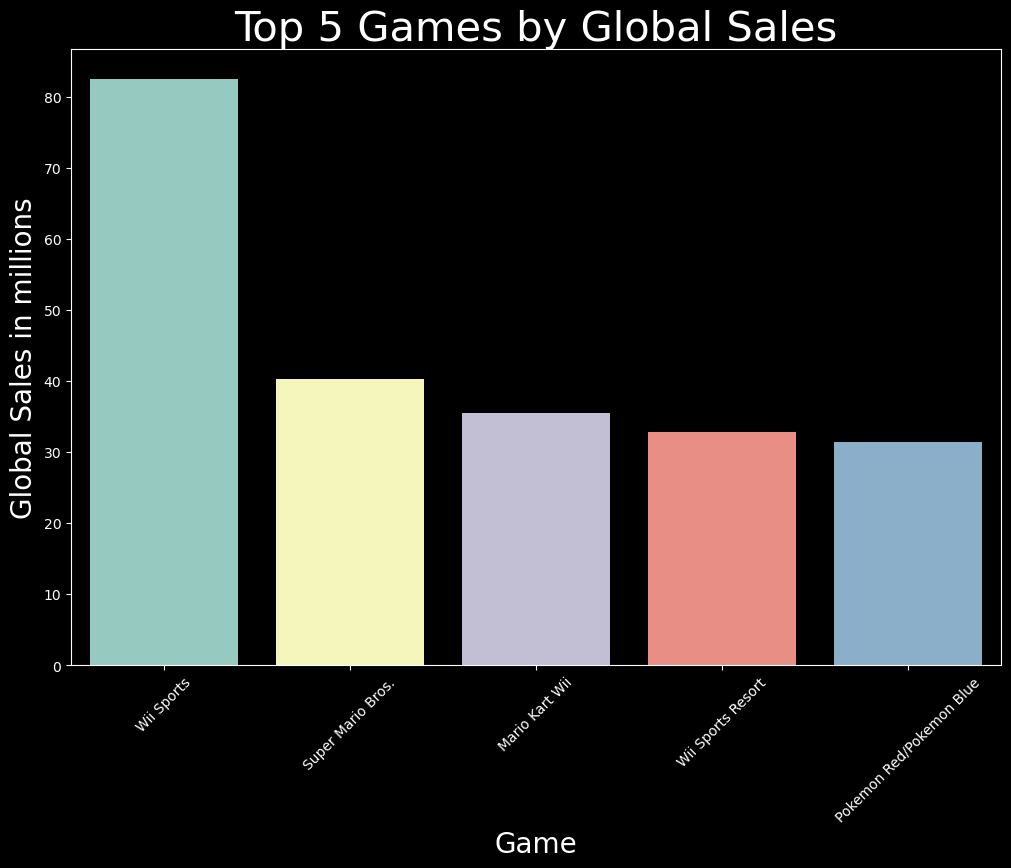

In [42]:
plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(data=top5, x="Name",y = "Global_Sales")
plt.xticks(rotation=45)
plt.xlabel("Game", fontsize=20)
plt.ylabel("Global Sales in millions", fontsize=20)
plt.title("Top 5 Games by Global Sales", fontsize = 30)
plt.show()

#### Conclusion Q1

I can see from the bar chart the Wii Sports is the most popular game based off its global sales. In fifth position was the pokemon games with 31.37 million sales globally. 

I set the value to millions as it seem that if its a global analysis, millions would be more apporopriate than thousands. 

## Is there a correlation between the na_sales and jp_sales for the years 2010-2014?

The best way to see visually see correlation between features is by using a heatmap. 

I began by storing the relevant years into varibales. Following this, I filtered out the data pertaining to these years and stored in variable (VG_filtered). Finally, I filtered out the two relevant years and stored that into a variable (salesData). To extract feature correlation, I used the .corr() method. The final step was to create the visual which can be seen below.  

In [43]:
start_year = 2010
end_year = 2014

In [44]:
VG_filtered = VG_data_clean[(VG_data_clean["Year_of_Release"] >= start_year) & (VG_data_clean["Year_of_Release"] <= end_year)];

In [45]:
salesData = VG_filtered[["NA_Sales","JP_Sales"]]

In [46]:
salesData.corr()

,NA_Sales,JP_Sales
NA_Sales,1.000000,0.260357
JP_Sales,0.260357,1.000000


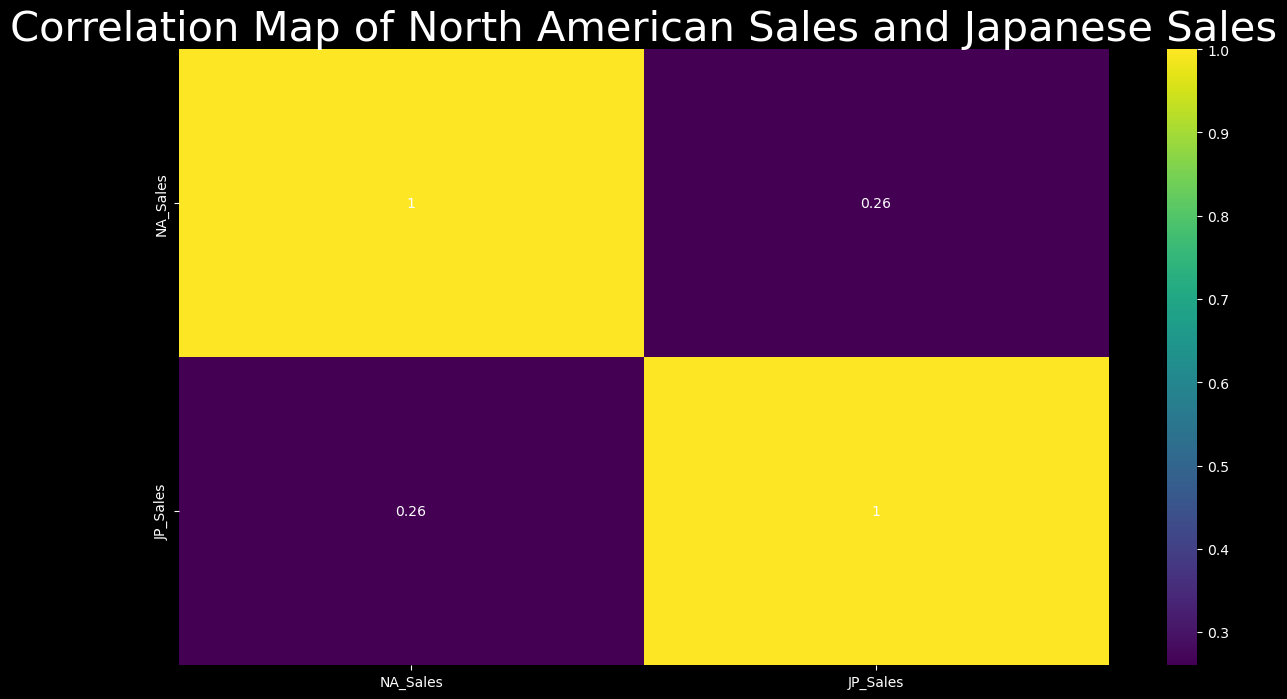

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(salesData.corr(), annot=True, cmap = "viridis",annot_kws={'color': 'white'} )
plt.title("Correlation Map of North American Sales and Japanese Sales", fontsize=30);

#### Conclusion Q2

Correlatoin is measured on a scale from 0-1. 0 being no correlation and 1 being heavily correlated. 

A result here of 0.26 would mean that there is some correlation between the features. However, it is a weak positve correlation but it is reading nonetheless and would indicate that the two varibale move slightly in the same direction.  

## What is the distribution of the most popular 4 game genres?

As the question here is some what open to interpretation, I have opted to do the proportional distributrion relative to the overall dataset. As I was dealing with proportional data, I used a pie chart to display the information.

To begin, I used the value_counts() method to count how many of each genres there were in the entire dataset and stored that in a variable(genre_valueCounts). By retaining only four most popular genres, it creates a differnet distribution. Using just four genres creates the percentages based on the top four only as oppose to the entire dataset. To see the top 4 on its own, I used the .head(4) method to only return the top 4 entries and stored that in a varibale (Top4_genre1). 

As a pie chart uses proportional data, I had get the per centage of each genre to the entire dataset. I rounded to two decimal places adn converted it to a list so it could be interpreted by matpltlibs pie chart function. 

In [48]:
#Counting genre values and displaying top 4
genre_valueCounts = VG_data_clean["Genre"].value_counts()
Top4_genre1 = genre_valueCounts.head(4)
Top4_genre1

Genre
Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Name: count, dtype: int64

In [49]:
#Counting genre values of entire dataset
genre_valueCounts = VG_data_clean["Genre"].value_counts()
Top4_genre = genre_valueCounts
Top4_genre

Genre
Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: count, dtype: int64

In [50]:
#Percentage of each genre to the entire dataset
frequency = Top4_genre/(len(VG_data_clean))
rounded = round(frequency, ndigits = 5)
print(rounded)

Genre
Action          0.20145
Sports          0.14047
Misc            0.10337
Role-Playing    0.09034
Shooter         0.07895
Adventure       0.07864
Racing          0.07462
Platform        0.05348
Simulation      0.05208
Fighting        0.05099
Strategy        0.04094
Puzzle          0.03466
Name: count, dtype: float64


In [51]:
RoundList=rounded.tolist()
print(RoundList)

[0.20145, 0.14047, 0.10337, 0.09034, 0.07895, 0.07864, 0.07462, 0.05348, 0.05208, 0.05099, 0.04094, 0.03466]


explode = seperation of each segment <br> 
labels = names of each segment <br>
percentages = List of percentages from above <br>
def func(pct, allvalues) = This function is calculating the percentages of each proportion.



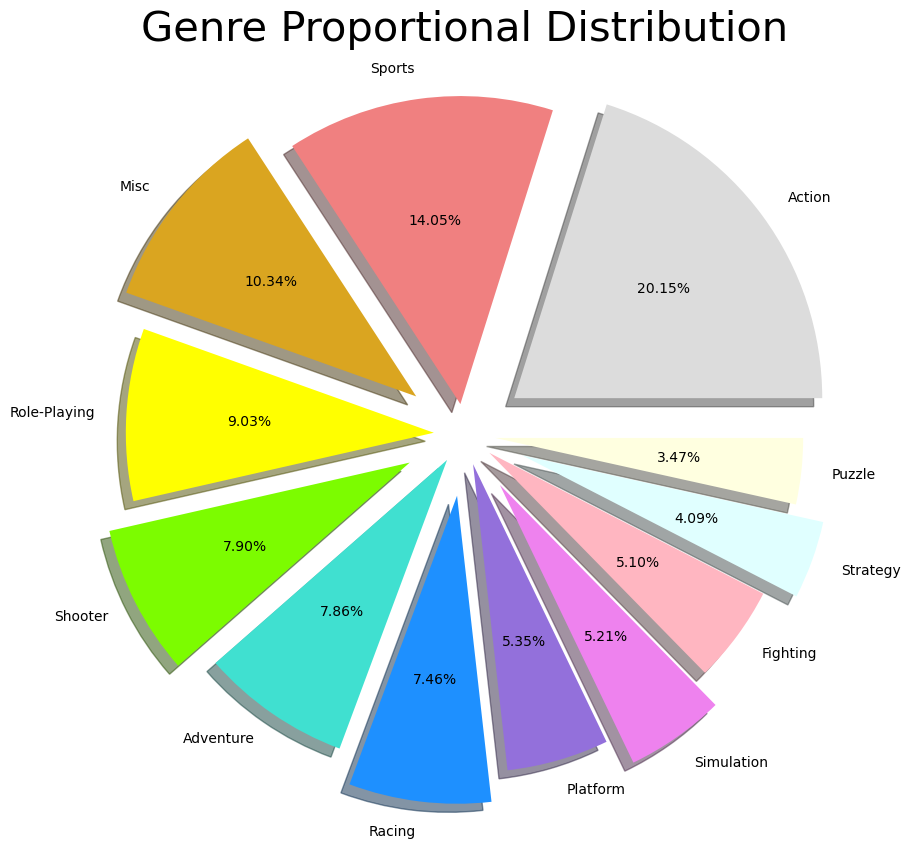

In [52]:
plt.style.use("default")

explode=(0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.1)
labels=["Action","Sports","Misc","Role-Playing","Shooter","Adventure","Racing","Platform","Simulation","Fighting","Strategy","Puzzle"]
percentages = RoundList

colours=["gainsboro","lightcoral","goldenrod","yellow","lawngreen","turquoise",
       "dodgerblue","mediumpurple","violet","lightpink","lightcyan","lightyellow"]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%".format(pct, absolute)

fig, ax = plt.subplots(figsize=(12, 10))
genre_distribution = ax.pie(RoundList,explode=explode,labels=labels,shadow=True,
                            autopct=lambda pct: func(pct, percentages),
                            textprops=dict(color="black"),colors=colours)


ax.set_title("Genre Proportional Distribution", fontsize=30)

plt.show()

#### Conclusion Q3

The final result is a depiction of the overall distribution of the genre feature. From this, we can clearly see the top four genres. They are : <br>
- Action <br>
- Sports <br>
- Misc <br>
- Role Playing

## Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005) ?

The best way to display the mean of a feature is by using a plot of some sort. For this question, I opted for a box plot. There was a little more coding involved to get the data ready to be plotted. I broke the data up into two seperate datasets. One containing data from pre 2005 and the other containing data from 2005 and on. After looking at the description of each I noticed that the data was skewed so I tidied it up by removing values based on the inter quartile range. This removed any outliers and centered the data around zero more so than at the outset. 

In [53]:
pre2005 = 2005
post2005 = 2005

In [54]:
VG_post_2005 = VG_data_clean[(VG_data_clean["Year_of_Release"] >= post2005)];
VG_pre_2005 = VG_data_clean[(VG_data_clean["Year_of_Release"] < pre2005)];

#### Filtering Games Before 2005

In [55]:
VG_pre_2005.shape

(5153, 10)

In [56]:
VG_pre_2005.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10


In [57]:
VG_pre_2005.reset_index(drop=True, inplace=True)

In [58]:
VG_pre_2005_EUsales = VG_pre_2005[["EU_Sales"]]

In [59]:
VG_pre_2005_EUsales_1 = VG_pre_2005_EUsales.rename(columns={"EU_Sales":"EU Sales Pre 2005"})
VG_pre_2005_EUsales_1.describe()

,EU Sales Pre 2005
count,5153.000000
mean,0.151595
std,0.389971
min,0.000000
25%,0.010000
50%,0.040000
75%,0.130000
max,8.890000


In [60]:
# IQR
# Calculate the upper and lower limits
Q1 = VG_pre_2005_EUsales_1["EU Sales Pre 2005"].quantile(0.25)
Q3 = VG_pre_2005_EUsales_1["EU Sales Pre 2005"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(VG_pre_2005_EUsales_1["EU Sales Pre 2005"] >= upper)[0]
lower_array = np.where(VG_pre_2005_EUsales_1["EU Sales Pre 2005"] <= lower)[0]

# Removing the outliers
VG_pre_2005_EUsales_1.drop(index=upper_array, inplace=True)
VG_pre_2005_EUsales_1.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", VG_pre_2005_EUsales_1.shape)

New Shape:  (4557, 1)


In [61]:
VG_pre_2005_EUsales_1.describe()

,EU Sales Pre 2005
count,4557.000000
mean,0.057253
std,0.069995
min,0.000000
25%,0.010000
50%,0.030000
75%,0.080000
max,0.310000


#### Filtering Games After 2005

In [62]:
VG_post_2005.shape

(11263, 10)

In [63]:
VG_post_2005.reset_index(drop=True, inplace=True)

In [64]:
VG_post_2005_EUsales = VG_post_2005[["EU_Sales"]]

In [65]:
VG_post_2005_EUsales_1 = VG_post_2005_EUsales.rename(columns={"EU_Sales":"EU Sales Post 2005"})
VG_post_2005_EUsales_1.describe()

,EU Sales Post 2005
count,11263.000000
mean,0.143489
std,0.552513
min,0.000000
25%,0.000000
50%,0.020000
75%,0.100000
max,28.960000


In [66]:
# IQR
# Calculate the upper and lower limits
Q1 = VG_post_2005_EUsales_1["EU Sales Post 2005"].quantile(0.25)
Q3 = VG_post_2005_EUsales_1["EU Sales Post 2005"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(VG_post_2005_EUsales_1["EU Sales Post 2005"] >= upper)[0]
lower_array = np.where(VG_post_2005_EUsales_1["EU Sales Post 2005"] <= lower)[0]

# Removing the outliers
VG_post_2005_EUsales_1.drop(index=upper_array, inplace=True)
VG_post_2005_EUsales_1.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", VG_post_2005_EUsales_1.shape)

New Shape:  (9756, 1)


In [67]:
VG_post_2005_EUsales_1.describe()

,EU Sales Post 2005
count,9756.000000
mean,0.034545
std,0.055292
min,0.000000
25%,0.000000
50%,0.010000
75%,0.040000
max,0.240000


The data was still showing signs of being skewed for both datasets. I could tell this by looking at the difference between the median and mean. Removing oultiers using the inter quartile range definaltley helped but for the purpose of this assignment, I feel that it is representative enough.  

In [68]:
meanPost=VG_post_2005_EUsales_1["EU Sales Post 2005"].mean()
roundedmeanPost=round(meanPost,3)
print("Mean for EU Sales Post 2005:", roundedmeanPost)

print("===================================================================")

meanPre=VG_pre_2005_EUsales_1["EU Sales Pre 2005"].mean()
roundedmeanPre=round(meanPre,3)
print("Mean for EU Sales Pre 2005:", roundedmeanPre)

Mean for EU Sales Post 2005: 0.035
Mean for EU Sales Pre 2005: 0.057


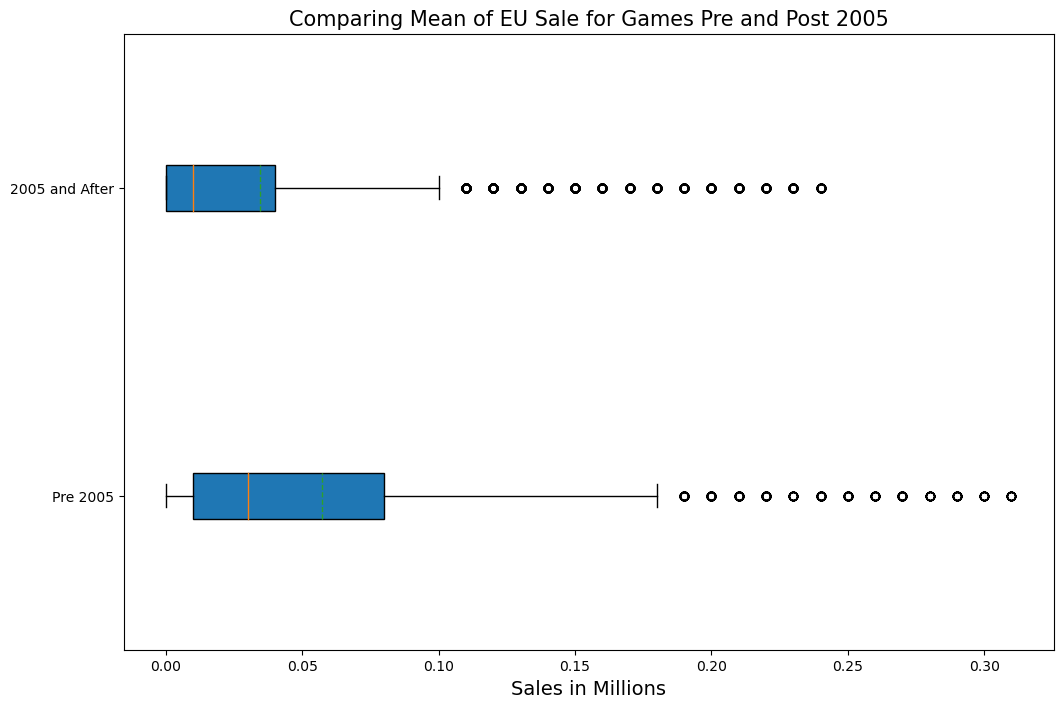

In [69]:
d1 = VG_pre_2005_EUsales_1["EU Sales Pre 2005"]
d2 = VG_post_2005_EUsales_1["EU Sales Post 2005"]

salesdata= [d1,d2]

fig = plt.figure(figsize =(12, 8))
ax = fig.add_subplot(111)

SALESboxPlot = ax.boxplot(salesdata,patch_artist = True,
                          vert = 0, showmeans=True, meanline=True)

ax.set_yticklabels(['Pre 2005', '2005 and After'])

plt.title("Comparing Mean of EU Sale for Games Pre and Post 2005", fontsize=15)
plt.xlabel("Sales in Millions", size=14)
plt.show()

#### Conclusion Q4
As you can see from the plots, the mean of the years prior to 2005 is higher than from 2005 and onwards. On the plots, the mean can be seen as the green line while the median can be seen as the orange line. The differnce in means is more then likely due to the difference in sample sizes. 

## What are the 3 most common “developer” in the dataset?

I opted for a bar chart here as I struggled to find a better way to display this information. Once again, I used the value_counts() method which did all the calculations for me. I created a dataset using this information which could then be used to formulate the table. As discussed previously, the dataset containing developer information was alot smaller due the number of Nan values. I am using that dataset for this table. It is based around a much smaller sample size, but still contains 7378 data entry points so is still quite valuable for gaining insight the most popular game developers.

In [70]:
VG_data_2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.5,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,6.6,Nintendo,E


In [71]:
DeveloperCounts = VG_data_2["Developer"].value_counts()

In [72]:
developCounts=pd.DataFrame(DeveloperCounts)

In [73]:
developCounts.head()

,count
Developer,
EA Sports,160
EA Canada,156
Capcom,130
Ubisoft,123
Konami,106


In [74]:
Top3vals = developCounts.head(3)

In [75]:
Top3vals1=pd.DataFrame(Top3vals)
Top3vals1.reset_index(inplace=True)

In [76]:
Top3vals1

,Developer,count
0,EA Sports,160
1,EA Canada,156
2,Capcom,130


In [77]:
Top3vals1["Developer"].unique()

array(['EA Sports', 'EA Canada', 'Capcom'], dtype=object)

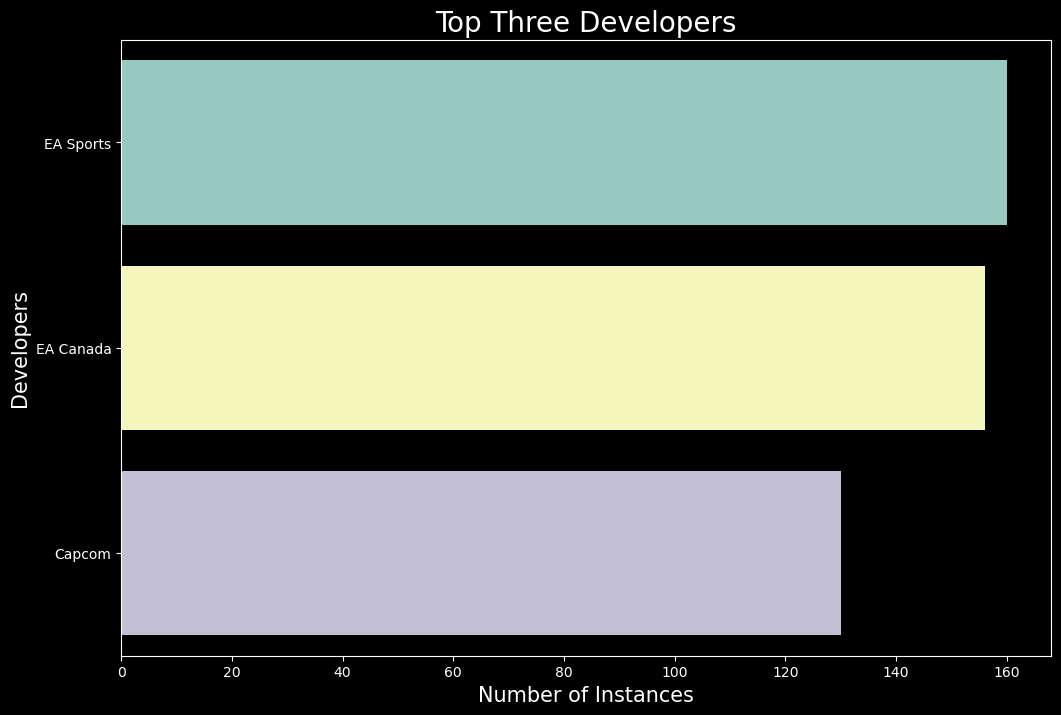

In [78]:
plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(x = "count", y = "Developer", data = Top3vals1)
plt.ylabel("Developers", fontsize=15)
plt.xlabel("Number of Instances", fontsize=15)
plt.title("Top Three Developers", fontsize=20)
plt.show()

#### Conclusion Q5

Appearing 201 times, Ubisoft is the most common developer in the dataset. Ea Sports is the second most common with 168 instances and EA Canada is third most common with 163 instances. 

## Compare the global sales in relation to the user score for PS2 platform?

For my question, I decided to compare global sales to how the public score the game for PS2. I think this is a valuable metric to see how each platform is comparing from users to sales revenue. This could be implemented across all the platoforms but for the purpose of the assignment I have only rolled it out on PS2. I am using a scatter plot to display this information as it plots numerical data on an x and y axis and will show any relationship between the variables. 

To begin, I filterd out all the entries relating to PS2. Then I made a separate dataset containing the global sales and user scores for the PS2 entries. The user score feature showed dtype of object with was incorrect and I spent alot of time trying to get the bottom of this. I concluded that they were all floating values so I used the astype() function to change it to its correct dtype. The global sales feature was heavily skewed here so I removed outliers using the inter quartile range as reference. This cleaned the data up enough to plot. 

In [79]:
platfrom = "PS2"

In [80]:
VG_PS2 = VG_data_2[(VG_data_2["Platform"] == platfrom)];

In [81]:
VG_PS2_user_df = VG_PS2[["Global_Sales","User_Score"]]

In [82]:
VG_PS2_user_df.head()

,Global_Sales,User_Score
11,20.81,9.0
14,16.15,8.7
16,14.98,8.4
23,13.10,8.5
30,11.66,8.5


In [83]:
VG_PS2_user_df.reset_index(drop=True,inplace=True)

In [84]:
VG_PS2_user_df.describe()

,Global_Sales,User_Score
count,1220.000000,1220.000000
mean,0.805672,7.625328
std,1.399143,1.309017
min,0.010000,1.700000
25%,0.160000,7.000000
50%,0.380000,8.000000
75%,0.862500,8.600000
max,20.810000,9.500000


In [85]:
VG_PS2_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Global_Sales  1220 non-null   float64
 1   User_Score    1220 non-null   float64
dtypes: float64(2)
memory usage: 19.2 KB


In [86]:
#VG_PS2_user_df["User_Score"]=VG_PS2_user_df["User_Score"].astype(float)

In [87]:
VG_PS2_user_df["User_Score"].value_counts()

User_Score
8.5    68
8.6    61
8.3    61
8.9    59
8.4    58
       ..
2.6     1
2.3     1
3.3     1
3.7     1
2.9     1
Name: count, Length: 70, dtype: int64

In [88]:
VG_PS2_user_df.head()

,Global_Sales,User_Score
0,20.81,9.0
1,16.15,8.7
2,14.98,8.4
3,13.10,8.5
4,11.66,8.5


In [89]:
# IQR
# Calculate the upper and lower limits
Q1 = VG_PS2_user_df["Global_Sales"].quantile(0.25)
Q3 = VG_PS2_user_df["Global_Sales"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(VG_PS2_user_df["Global_Sales"] >= upper)[0]
lower_array = np.where(VG_PS2_user_df["Global_Sales"] <= lower)[0]

# Removing the outliers
VG_PS2_user_df.drop(index=upper_array, inplace=True)
VG_PS2_user_df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", VG_PS2_user_df.shape)

New Shape:  (1098, 2)


/var/folders/zj/v6srnlys1bg34vwc_mjk_x_80000gn/T/ipykernel_10389/1710547148.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VG_PS2_user_df.drop(index=upper_array, inplace=True)
/var/folders/zj/v6srnlys1bg34vwc_mjk_x_80000gn/T/ipykernel_10389/1710547148.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VG_PS2_user_df.drop(index=lower_array, inplace=True)


In [90]:
VG_PS2_user_df.describe()

,Global_Sales,User_Score
count,1098.000000,1098.000000
mean,0.467896,7.556922
std,0.439146,1.337555
min,0.010000,1.700000
25%,0.140000,6.900000
50%,0.330000,8.000000
75%,0.600000,8.500000
max,1.880000,9.500000


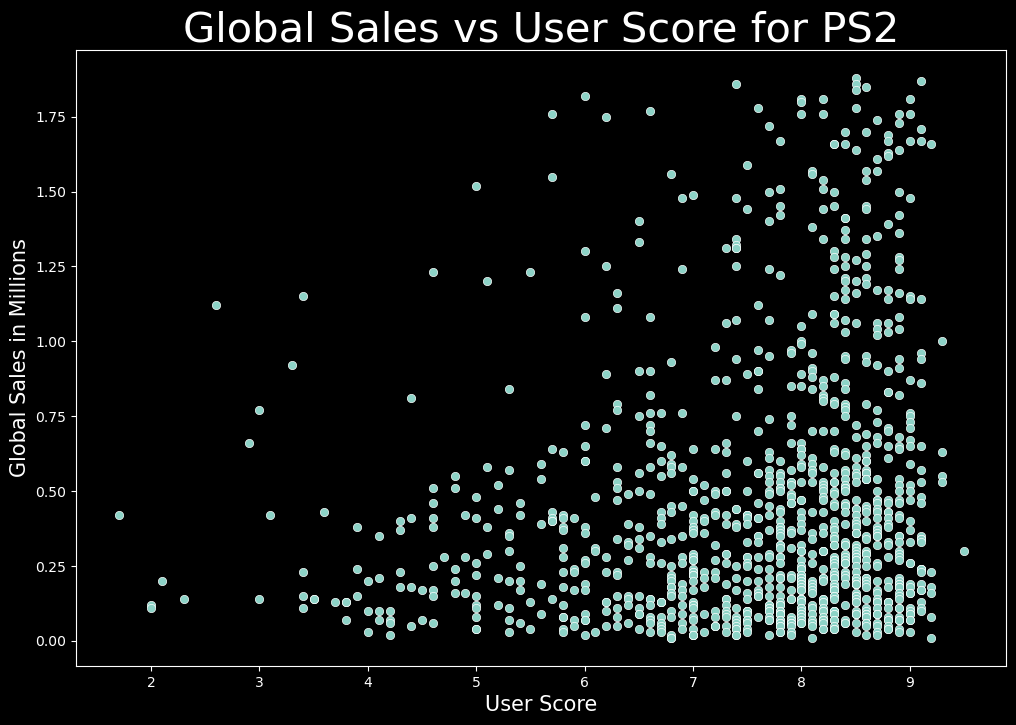

In [91]:
plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.scatterplot(x = "User_Score", y = "Global_Sales", data = VG_PS2_user_df)
plt.ylabel("Global Sales in Millions", fontsize=15)
plt.xlabel("User Score", fontsize=15)
plt.title("Global Sales vs User Score for PS2", fontsize= 30)
plt.show()

#### Conclusion Q6

From examining the scaterplot I can that there is alot of useful information. The biggest concentration of data is the bottom right quadrant of the plot. I can see the majority of the games with a high user score have a middelen to low global sales reveune. While there is still plenty of PS2 games that have a high user score and high sales revenue I can conclude that a high user score, while is an important metric to achieving revenue, doesn't always lead to the best sales revenue. 